<a href="https://colab.research.google.com/github/FathimaNazarudeen/s3./blob/main/SER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import librosa
from librosa import display

data, sampling_rate = librosa.load('/content/drive/MyDrive/ravdess/Audio_Speech_Actors_01-24/Actor_01/03-01-01-01-01-01-01.wav')


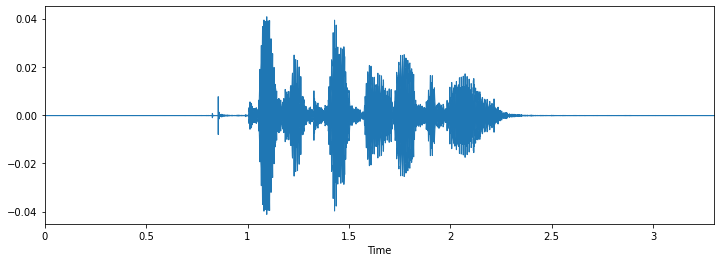

In [4]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import glob 

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [5]:
import numpy as np

In [6]:
import time

path = '/content/drive/MyDrive/ravdess'
lst = []

start_time = time.time()

for subdir, dirs, files in os.walk(path):
  for file in files:
      try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        file = int(file[7:8]) - 1 
        arr = mfccs, file
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")

--- Data loaded. Loading time: 1328.400610923767 seconds ---


In [7]:
X, y = zip(*lst)

In [8]:
X = np.asarray(X)
y = np.asarray(y)


X.shape, y.shape

((4317, 40), (4317,))

In [9]:
import joblib

X_name = 'X.joblib'
y_name = 'y.joblib'
save_dir = '/content/drive/My Drive/Ravdess_model'

savedX = joblib.dump(X, os.path.join(save_dir, X_name))
savedy = joblib.dump(y, os.path.join(save_dir, y_name))

In [42]:
X = joblib.load('/content/drive/My Drive/Ravdess_model/X.joblib')
y = joblib.load('/content/drive/My Drive/Ravdess_model/y.joblib')

In [43]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
     

Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dtree = DecisionTreeClassifier()
     

dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
predictions = dtree.predict(X_test)

In [47]:

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       134
           1       0.84      0.82      0.83       251
           2       0.81      0.73      0.77       242
           3       0.81      0.76      0.78       271
           4       0.87      0.85      0.86       253
           5       0.73      0.85      0.79       239
           6       0.75      0.74      0.74       127
           7       0.70      0.76      0.73       116

    accuracy                           0.79      1633
   macro avg       0.78      0.79      0.79      1633
weighted avg       0.80      0.79      0.79      1633



Random forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:

rforest = RandomForestClassifier(criterion="gini", max_depth=10, max_features="log2", 
                                 max_leaf_nodes = 100, min_samples_leaf = 3, min_samples_split = 20, 
                                 n_estimators= 22000, random_state= 5)

In [50]:
rforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', max_leaf_nodes=100,
                       min_samples_leaf=3, min_samples_split=20,
                       n_estimators=22000, random_state=5)

In [51]:
predictions = rforest.predict(X_test)
     

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.53      0.69       134
           1       0.66      0.96      0.78       251
           2       0.86      0.71      0.78       242
           3       0.79      0.64      0.71       271
           4       0.89      0.87      0.88       253
           5       0.70      0.80      0.75       239
           6       0.74      0.57      0.65       127
           7       0.59      0.79      0.68       116

    accuracy                           0.76      1633
   macro avg       0.78      0.74      0.74      1633
weighted avg       0.78      0.76      0.75      1633



Neural network

In [65]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [66]:
x_traincnn.shape, x_testcnn.shape

((3315, 40, 1), (1633, 40, 1))

In [67]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(128, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)
     

In [68]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 40, 128)           768       
                                                                 
 activation_21 (Activation)  (None, 40, 128)           0         
                                                                 
 dropout_14 (Dropout)        (None, 40, 128)           0         
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 5, 128)           0         
 1D)                                                             
                                                                 
 conv1d_15 (Conv1D)          (None, 5, 128)            82048     
                                                                 
 activation_22 (Activation)  (None, 5, 128)            0         
                                                      

In [69]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [71]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=1000, validation_data=(x_testcnn, y_test))

Epoch 1/1000
208/208 [==============================] - 2s 8ms/step - loss: 6.6923 - accuracy: 0.1388 - val_loss: 2.3871 - val_accuracy: 0.1598
Epoch 2/1000
208/208 [==============================] - 1s 7ms/step - loss: 5.0694 - accuracy: 0.1538 - val_loss: 2.1464 - val_accuracy: 0.2021
Epoch 3/1000
208/208 [==============================] - 2s 9ms/step - loss: 3.9177 - accuracy: 0.1756 - val_loss: 2.1950 - val_accuracy: 0.2205
Epoch 4/1000
208/208 [==============================] - 2s 10ms/step - loss: 3.0707 - accuracy: 0.1979 - val_loss: 1.8258 - val_accuracy: 0.2927
Epoch 5/1000
208/208 [==============================] - 1s 7ms/step - loss: 2.5488 - accuracy: 0.2045 - val_loss: 1.9138 - val_accuracy: 0.2002
Epoch 6/1000
208/208 [==============================] - 2s 10ms/step - loss: 2.2252 - accuracy: 0.2229 - val_loss: 1.7926 - val_accuracy: 0.2988
Epoch 7/1000
208/208 [==============================] - 2s 10ms/step - loss: 2.0263 - accuracy: 0.2434 - val_loss: 1.7782 - val_accura

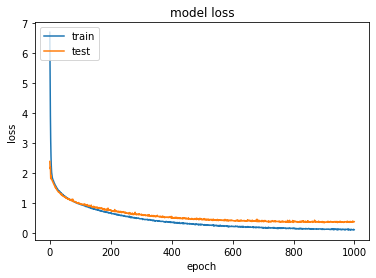

In [72]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

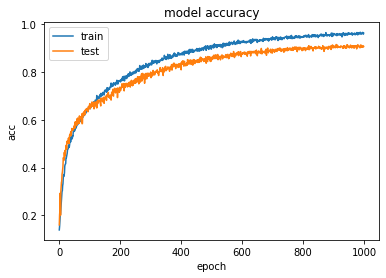

In [77]:
plt.plot(cnnhistory.history["accuracy"])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [79]:
predict_x=model.predict(x_testcnn) 
classes_x=np.argmax(predict_x,axis=1)

52/52 [==============================] - 0s 4ms/step


In [80]:
classes_x

array([2, 4, 3, ..., 1, 4, 0])

In [82]:
y_test

array([1, 4, 3, ..., 1, 4, 0])

In [83]:
new_Ytest = y_test.astype(int)

In [84]:
new_Ytest

array([1, 4, 3, ..., 1, 4, 0])

In [85]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, classes_x)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.90      0.93       134
           1       0.95      0.91      0.93       251
           2       0.85      0.92      0.89       242
           3       0.90      0.86      0.88       271
           4       0.90      0.97      0.93       253
           5       0.90      0.92      0.91       239
           6       0.91      0.90      0.90       127
           7       0.89      0.84      0.86       116

    accuracy                           0.91      1633
   macro avg       0.91      0.90      0.90      1633
weighted avg       0.91      0.91      0.91      1633



In [86]:

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_Ytest, classes_x)
print (matrix)

[[120   6   4   4   0   0   0   0]
 [  1 229  13   3   2   2   1   0]
 [  2   0 223   2   8   5   0   2]
 [  0   4   2 233   6  14   4   8]
 [  0   0   4   2 245   0   2   0]
 [  0   0   2  16   0 219   2   0]
 [  0   0   4   0   7   0 114   2]
 [  0   2   9   0   4   2   2  97]]


In [87]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = '/content/drive/My Drive/Ravdess_model'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/My Drive/Ravdess_model/Emotion_Voice_Detection_Model.h5 


In [88]:
loaded_model = keras.models.load_model('/content/drive/My Drive/Ravdess_model/Emotion_Voice_Detection_Model.h5')
loaded_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 40, 128)           768       
                                                                 
 activation_21 (Activation)  (None, 40, 128)           0         
                                                                 
 dropout_14 (Dropout)        (None, 40, 128)           0         
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 5, 128)           0         
 1D)                                                             
                                                                 
 conv1d_15 (Conv1D)          (None, 5, 128)            82048     
                                                                 
 activation_22 (Activation)  (None, 5, 128)            0         
                                                      

In [89]:
loss, acc = loaded_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

52/52 [==============================] - 0s 3ms/step - loss: 0.3801 - accuracy: 0.9063
Restored model, accuracy: 90.63%
